In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os, sys


Using TensorFlow backend.


In [3]:
import sklearn

In [4]:
import scipy

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'CHIDC',
 'cleaning and data classification.ipynb',
 'data',
 'MIT attr',
 'MIT_csv',
 'MIT_dat',
 'MIT_hea',
 'MIT_txt',
 'model',
 'qrs-tutorial',
 'Record']

In [7]:
#attribute_dir



attribute_directory = os.getcwd() + '\\MIT attr'

# csv data
csv_directory = os.getcwd() + '\\MIT_csv'

# text data
hea_directory = os.getcwd() + '\\MIT_hea'

#dat data
dat_directory = os.getcwd() + '\\MIT_dat'

# default directory
default_directory = os.getcwd()

In [8]:
attributes_data = []
csv_data = []
hea_data = []
dat_data = []

def find_data(directory):
    os.chdir(directory)
    data = os.listdir()
    os.chdir(default_directory)
    return data

attributes_data = find_data(attribute_directory)
csv_data = find_data(csv_directory)
hea_data = find_data(hea_directory)
dat_data = find_data(dat_directory)

len(attributes_data), len(csv_data), len(hea_data), len(dat_data)

(48, 49, 48, 48)

## an overview with the 100 data

In [14]:
from scipy.io import arff


def get_data(info):
    
    info_x = info + '.csv'
    # get csv data
    os.chdir(csv_directory)
    get_csv = pd.read_csv(info_x)
    
    # get attributes data
    info_y = info + '.atr'
    os.chdir(attribute_directory)
    attribute = np.fromfile(info_y)
    
    # get text data
    info_z = info + '.dat'
    os.chdir(dat_directory)
    dat = np.fromfile(info_z)
    
    os.chdir(default_directory)
    
    return get_csv, attribute,dat

csv100, attr100,dat100 = get_data('100')

In [15]:
key = csv100[1:].keys()

In [16]:
d = csv100[1:].drop(key[0], axis = 1)


In [17]:
d[key[1]] = d[key[1]].astype(np.float32)
d[key[2]] = d[key[2]].astype(np.float32)

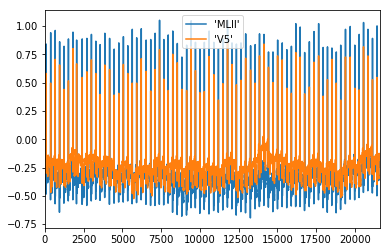

In [18]:
import matplotlib.pyplot as plt
d.plot()
plt.show()

In [19]:
import wfdb as wf

In [20]:
os.listdir()

['.ipynb_checkpoints',
 'CHIDC',
 'cleaning and data classification.ipynb',
 'data',
 'MIT attr',
 'MIT_csv',
 'MIT_dat',
 'MIT_hea',
 'MIT_txt',
 'model',
 'qrs-tutorial',
 'Record']

# R peak Detection

In [21]:
attribute_directory = os.getcwd() + '\\MIT attr'

# csv data
csv_directory = os.getcwd() + '\\MIT_csv'

# text data
hea_directory = os.getcwd() + '\\MIT_hea'

#dat data
dat_directory = os.getcwd() + '\\MIT_dat'

record_dir = os.getcwd() + '\
# default directory
default_directory = os.getcwd()

SyntaxError: EOL while scanning string literal (<ipython-input-21-deee982b2fca>, line 12)

In [22]:
#os.mkdir('Record')
os.listdir()
record_dir = os.getcwd() + '\\Record'

In [72]:
import shutil
for i in attributes_data:
    try:
        string = i[:-4]
        #navigate to new path
        os.chdir(record_dir)
        os.mkdir(string)
        new_path = os.getcwd() + '\\'+string
        #os.chdir(new_path)

        #dump .atr file from old to new path
        os.chdir(attribute_directory)
        old_dir = attribute_directory + '\\'+ string+'.atr'
        shutil.copy(old_dir,new_path)

        # dump .dat file from old to new path
        os.chdir(dat_directory)
        old_dir = dat_directory + '\\' +string + '.dat'
        shutil.copy(old_dir, new_path)

        #dump .hea file from old to new path
        os.chdir(hea_directory)
        old_dir = hea_directory + '\\' + string + '.hea'
        shutil.copy(old_dir, new_path)

        # dump .csv file from old to new path
        os.chdir(csv_directory)
        old_dir = csv_directory + '\\' + string + '.csv'
        shutil.copy(old_dir, new_path)

        os.chdir(default_directory)
        
    except (FileNotFoundError,FileExistsError) as file:
        continue

    
    
    

In [73]:
os.chdir(record_dir)
path = default_directory + '\\Record\\119'
os.chdir(path)

In [74]:
record_data = os.listdir()


In [75]:
path

'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\119'

In [76]:
path = path + '\\119'

In [77]:
path

'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\119\\119'

In [78]:
record = wf.rdsamp(path)

In [79]:
annotation = wf.rdann(path, 'atr')

In [80]:
record[1]

{'base_date': None,
 'base_time': None,
 'comments': ['51 F 1129 654 x2', 'Pronestyl', 'The PVCs are uniform.'],
 'fs': 360,
 'n_sig': 2,
 'sig_len': 650000,
 'sig_name': ['MLII', 'V1'],
 'units': ['mV', 'mV']}

In [81]:
record[0].shape

(650000, 2)

In [82]:
print('Sampling frequency used for this record: ', record[1]['fs'])
print('shape of loaded data array: ', record[0].shape)
print('Number of loaded annotations: ', annotation.ann_len)
print('Third annotation is of type: ', annotation.symbol[2])

Sampling frequency used for this record:  360
shape of loaded data array:  (650000, 2)
Number of loaded annotations:  2094
Third annotation is of type:  V


ECG channel type:  MLII


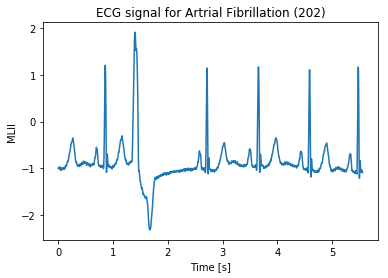

In [83]:
import matplotlib.pyplot as plt

#select one of the channels (ther are two)
chid = 0
data = record[0]
channel = data[:,chid]


print('ECG channel type: ', record[1]['sig_name'][chid])

#plot only the first 2000 samples
howmany = 2000

# calculate time values in seconds
times = np.arange(howmany, dtype = 'float')/record[1]['fs']
plt.plot(times, channel[:howmany])
plt.xlabel('Time [s]')
plt.ylabel('MLII')
plt.title('ECG signal for Artrial Fibrillation (202)')
plt.show()

In [84]:
def show_annotations(path):
    """ Exemplary code """
    record = wf.rdsamp(path)
    annotation = wf.rdann(path, 'atr')

    # Get data and annotations for the first 2000 samples
    howmany = 2000
    channel = record[0][:howmany, 0]

    # Extract all of the annotation related infromation
    where = annotation.sample < howmany
    samp = annotation.sample[where]

    # Convert to numpy.array to get fancy indexing access
    types = np.array(annotation.symbol)
    types = types[where]

    times = np.arange(howmany, dtype = 'float') / record[1]['fs']
    plt.plot(times, channel)

    # Prepare qrs information for the plot
    qrs_times = times[samp]

    # Scale to show markers at the top 
    qrs_values = np.ones_like(qrs_times)
    qrs_values *= channel.max() * 1.4
    
    #dict_data = {'qrt_times':qrs_times, 'qrs_values':qrs_values}
    #frame = pd.DataFrame(dict_data)
    #new_path = r'C:\Users\CHIDINMA\Desktop\MY_WORK\Record\Rpeaks'
    #string = new_path +'\\' + path[-3:]+ '.csv'
    #frame.to_csv(string)

    plt.plot(qrs_times, qrs_values, 'ro')
    # Also show annotation code
    # And their words
    for it, sam in enumerate(samp):
        # Get the annotation position
        xa = times[sam]
        ya = channel.max() * 1.1
        # Use just the first letter 
        a_txt = types[it]
        plt.annotate(a_txt, xy = (xa, ya))
    plt.xlim([0, 4])
    plt.xlabel('Time [s]')
    new_path = r'C:\Users\CHIDINMA\Desktop\MY_WORK\Record\Rpeaks'
    string = new_path +'\\' + path[-3:]
    plt.savefig(string)
    plt.show()
    return


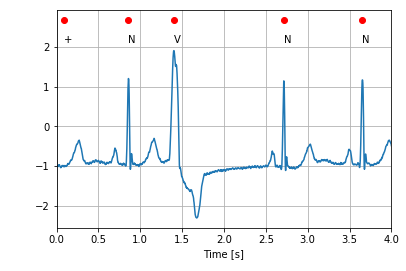

In [85]:
plt.grid('on')
show_annotations(path)

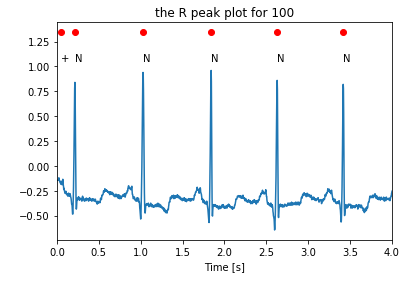

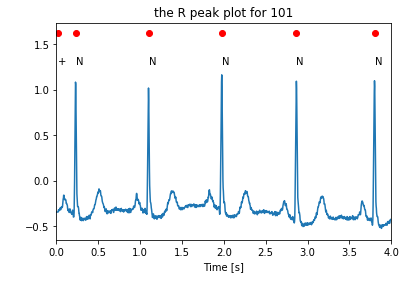

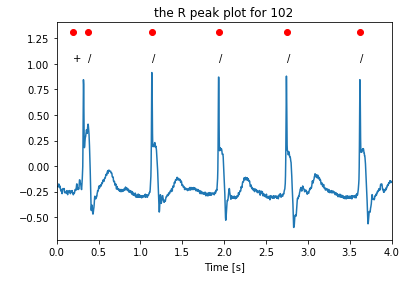

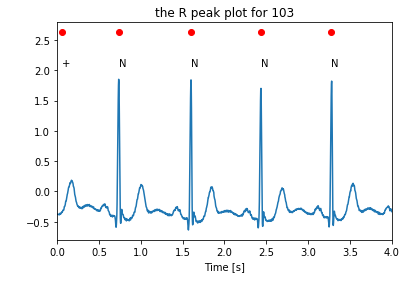

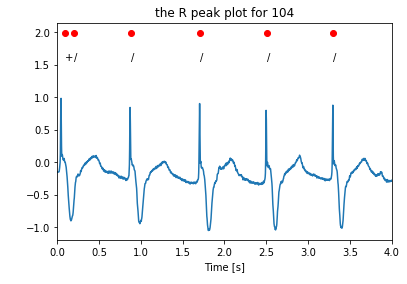

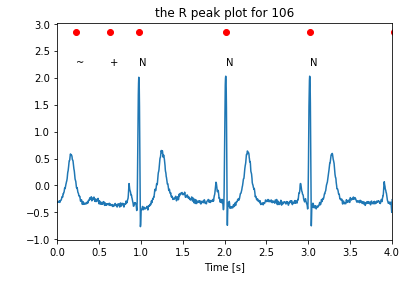

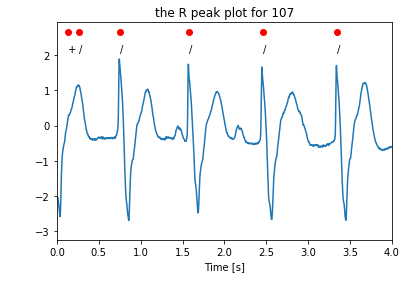

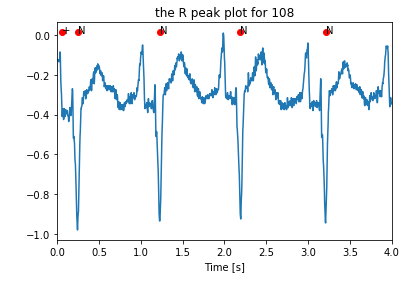

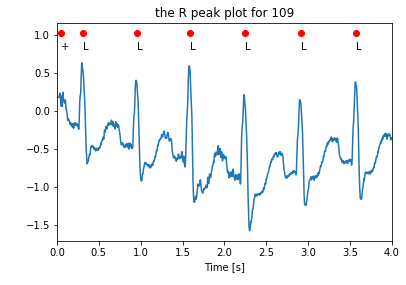

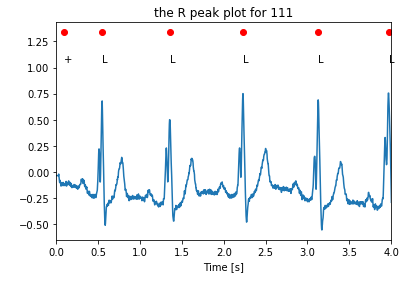

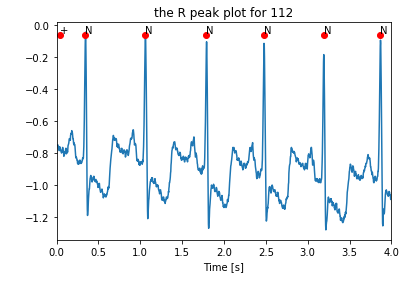

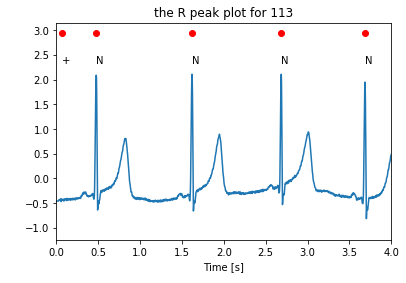

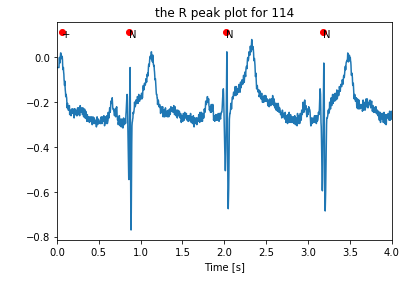

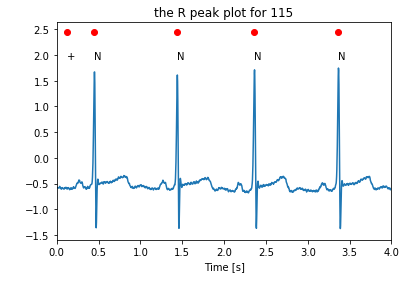

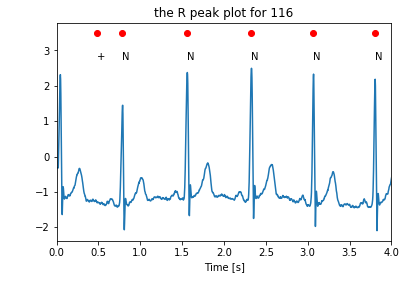

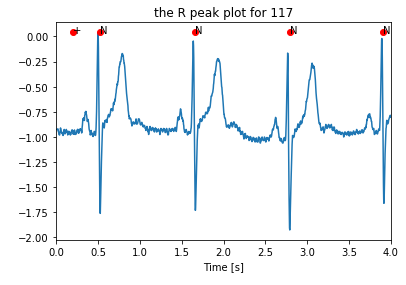

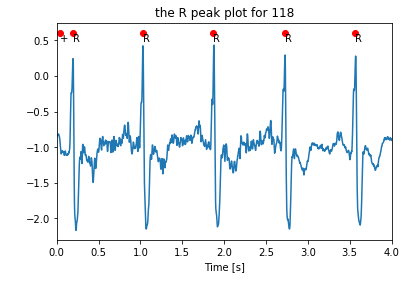

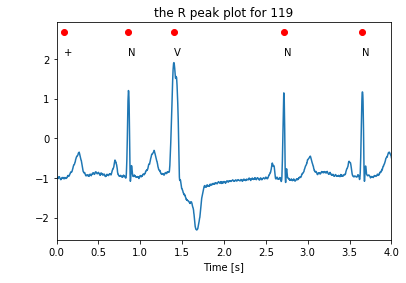

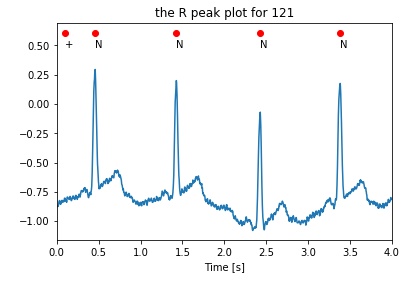

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\121 (1)\\121 (1).hea'

In [88]:
os.chdir('C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record')
get_dir = os.getcwd()
def plot_more(path):
    os.chdir(path)
    for k in os.listdir():
        new_path = get_dir + '\\'+k + '\\'+k
        plt.title('the R peak plot for ' + str(k))
        show_annotations(new_path)
    return

plot_more('C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record')

In [ ]:
import numpy as np
def show_objective():
    """ For the model """
    # Choose a record
    
    record = wf.rdsamp(path)
    ann = wf.rdann(path, 'atr')

    chid = 0
    print ('Channel:', record[1]['sig_name'][chid])

    cha = record[0][:, chid]

    # These were found manually
    sta = 184000
    end = sta + 100
    times = np.arange(end-sta, dtype = 'float')
    times /= record[1]['fs']

    # Extract the annotations for that fragment
    where = (sta < ann.sample) & (ann.sample < end)
    samples = ann.sample[where] - sta
    print (samples)

    # Prepare dirac-comb type of labels
    qrs_values = np.zeros_like(times)
    qrs_values[samples] = 1

    # Prepare gaussian-comb type of labels
    kernel = np.hamming(36)
    qrs_gauss = np.convolve(kernel,
                            qrs_values,
                            mode = 'same')

    # Make the plots
    fig = plt.figure()
    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(times, cha[sta : end])

    ax2 = fig.add_subplot(3,1,2, sharex=ax1)
    ax2.plot(times,
             qrs_values,
             'C1',
             lw = 4,
             alpha = 0.888)
    ax3 = fig.add_subplot(3,1,3, sharex=ax1)
    ax3.plot(times,
             qrs_gauss,
             'C3',
             lw = 4,
             alpha = 0.888)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.xlabel('Time [s]')
    plt.xlim([0, 0.277])
    plt.show()

In [87]:
show_objective()

NameError: name 'show_objective' is not defined

In [ ]:
def show_objective_part2():
    """ For the model """
    # Choose a record
    record = wf.rdsamp(path)
    ann = wf.rdann(path, 'atr')
    
    
    chid = 0
    print ('Channel:', record[1]['sig_name'][chid])

    cha = record[0][:, chid]

    # These were found manually
    sta = 184000
    end = sta + 100
    times = np.arange(end-sta, dtype = 'float')
    times /= record[1]['fs']
    
    
    # Extract the annotations for that fragment
    where = (sta < ann.sample) & (ann.sample < end)
    samples = ann.sample[where] - sta
    print (samples)

    # Prepare dirac-comb type of labels
    qrs_values = np.zeros_like(times)
    qrs_values[samples] = 1

    # Prepare gaussian-comb type of labels
    kernel = np.hamming(36)
    qrs_gauss = np.convolve(kernel,
                            qrs_values,
                            mode = 'same')

    # Make the plots
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(times, cha[sta : end])
    ax1.set_title('Input', loc = 'left')

    ax2 = fig.add_subplot(2,1,2, sharex=ax1)
    ax2.plot(times,
             qrs_gauss,
             'C3',
             lw = 4,
             alpha = 0.888)
    ax2.set_title('Output', loc = 'left')
    ax1.grid()
    ax2.grid()
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.xlabel('Time [s]')
    plt.xlim([0, 0.25])
    plt.show()


In [ ]:
show_objective_part2()

In [ ]:
#!pip install heartpy

import heartpy as hp

In [34]:
def good_types():
    """ Of annotations """
    # www.physionet.org/physiobank/annotations.shtml
    good = ['N', 'L', 'R', 'B', 'A',
            'a', 'J', 'S', 'V', 'r',
            'F', 'e', 'j', 'n', 'E',
            '/', 'f', 'Q', '?']

    return good

def beat_annotations(annotation):
    """ Get rid of non-beat markers """
    # Declare beat types
    good = good_types()
    ids = np.in1d(annotation.symbol, good)

    # We want to know only the positions
    beats = annotation.sample[ids]

    return beats

def convert_input(channel, annotation):
    """ Into output """
    # Remove non-beat annotations
    beats = beat_annotations(annotation)

    # Create dirac-comb signal
    dirac = np.zeros_like(channel)
    dirac[beats] = 1.0

    # Use hamming window as a bell-curve filter
    width = 36
    filter = np.hamming(width)
    gauss = np.convolve(filter, dirac, mode = 'same')

    return dirac, gauss

In [35]:
def convert_data(data, annotations, width):
    """ Into a batch """
    # Prepare containers
    signals, labels = [], []

    # Convert both channels
    for it in range(2):
        channel = data[:, it]
        dirac, gauss = convert_input(channel,
                                     annotations)
        # Merge labels
        label = np.vstack([dirac, gauss])

        # Prepare the moving window
        sta = 0
        end = width
        stride = width
        while end <= len(channel):
            # Chop out the fragments
            s_frag = channel[sta : end]
            l_frag = label[:, sta : end]

            # Cumulate
            signals.append(s_frag)
            labels.append(l_frag)

            # Go forth
            sta += stride
            end += stride

    # Turn into arrays
    signals = np.array(signals)
    labels = np.array(labels)

    return signals, labels

In [36]:
os.getcwd()

'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\117'

In [37]:
os.chdir(r'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record')
records = os.listdir()
records.remove('121 (1)')

In [38]:
records.remove('SaveTrainTest')
len(records)

47

In [39]:
record_path = []
for k in records:
    new= r'C:\Users\CHIDINMA\Desktop\MY_WORK\Record' + '\\'+k 
    record_path.append(new)
record_path[:5]

['C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\100',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\101',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\102',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\103',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\104']

In [40]:
record_path[:5]

['C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\100',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\101',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\102',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\103',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\104']

In [41]:
os.chdir('C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record')

In [42]:
train_data = record_path[:35]
test_data = record_path[36:]
current_dir = os.getcwd()
new_path = current_dir + '\\SaveTrainTest'
os.chdir(new_path)
#os.mkdir('train')
#os.mkdir('test')

savepath = r'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record' + '\\SaveTrainTest\\train'
os.chdir(default_directory)

In [43]:
normal = ['100','101','103','108','109','111','112','113','114','115','116','117',
         '118','121','122','123','212','234']


In [44]:
os.getcwd()

'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK'

In [116]:
def make_dataset(records, width, savepath):
    """ Inside an array """
    # Prepare containers
    signals, labels = [], []

    # Iterate files
    target = []
    for path in records:
        if path[-3:] in normal:
            print ('Processing file:', path)
            os.chdir(path)
            update_path = path + '\\'+path[-3:]
            record = wf.rdsamp(update_path)
            annotations = wf.rdann(update_path, 'atr')

            
            # Extract pure signals
            
            data = record[0][:10000,:]
            print(data.shape)

            
            # Convert each channel into labeled fragments
            #signal, label = convert_data(data, annotations, width)

            # Cumulate
            signals.append(data)
            #labels.append(label)
            target.append(1)

        else:
            print ('Processing file:', path)
            os.chdir(path)
            update_path = path + '\\'+path[-3:]
            record = wf.rdsamp(update_path)
            annotations = wf.rdann(update_path, 'atr')

            
            # Extract pure signals
            data = record[0][:10000,:]
            print(data.shape)

            
            # Convert each channel into labeled fragments
            #signal, label = convert_data(data, annotations, width)
            

            # Cumulate
            signals.append(data)
            #labels.append(label)
            target.append(0)
            
    return signals,target

    
    


In [117]:
os.chdir('C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\SaveTrainTest')

In [118]:
#os.chdir(savepath)

In [119]:
os.getcwd()

'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\SaveTrainTest'

In [120]:
record_path[:3]

['C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\100',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\101',
 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\102']

In [121]:
savepath

'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\SaveTrainTest\\test\\test'

In [122]:
width = 100
savepath = 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\SaveTrainTest\\train\\train'
signal, target = make_dataset(record_path,width,savepath)

signals = np.array(signal)
print(signals.shape)
target = np.array(target)
print(target.shape)
np.save(savepath, {'signals' : signals,'labels'  : target })

Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\100
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\101
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\102
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\103
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\104
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\106
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\107
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\108
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\109
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\111
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\112
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\113
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\114
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\

In [123]:
len(test_data)

11

In [124]:
#test_data.remove(r'C:\Users\CHIDINMA\Desktop\MY_WORK\Record\SaveTrainTest')

In [125]:
savepath = 'C:\\Users\\CHIDINMA\\Desktop\\MY_WORK\\Record\\SaveTrainTest\\test\\test'
width = 100
signal, target = make_dataset(test_data,width,savepath)

signals = np.array(signal)
print(signals.shape)
target = np.array(target)
print(target.shape)
np.save(savepath, {'signals' : signals,'labels'  : target })


Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\219
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\220
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\221
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\222
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\223
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\228
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\230
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\231
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\232
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\233
(10000, 2)
Processing file: C:\Users\CHIDINMA\Desktop\MY_WORK\Record\234
(10000, 2)
(11, 10000, 2)
(11,)
